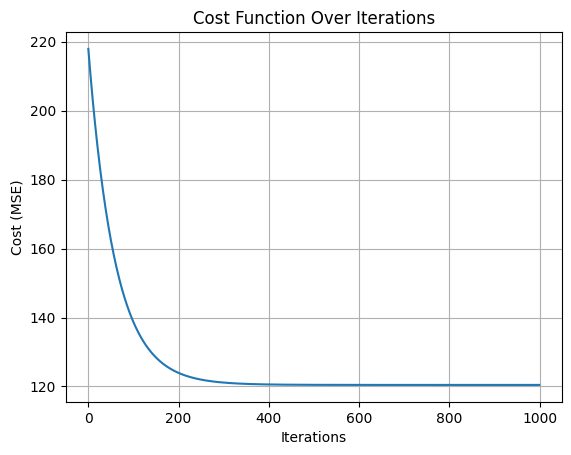

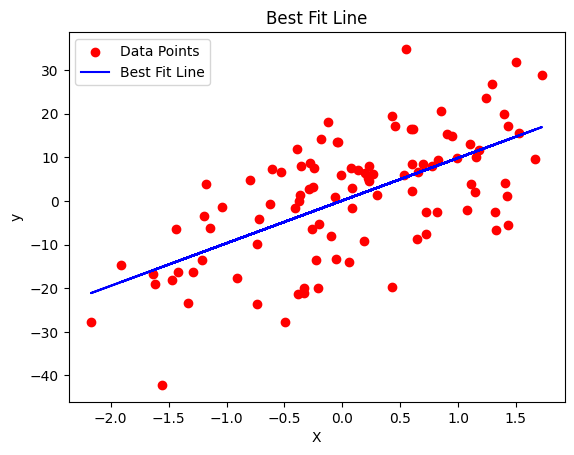

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate a random regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10)

# Reshape y to be a 2D array for matrix operations
y = y.reshape(-1, 1)

# Add a bias term (intercept) to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient_descent(X, y, learning_rate, num_iterations):
    # Initialize parameter theta (our weight matrix)
    theta = np.random.randn(X.shape[1], 1)

    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted values:
        predictions = np.dot(X, theta)

        # Calculate the error:
        error = predictions - y

        # Calculate the gradients:
        gradients = (1/m) * np.dot(X.T, error)

        # Update parameters:
        theta -= learning_rate * gradients

        # Calculate the cost function:
        cost = mse(y, predictions)
        cost_history.append(cost)

    return theta, cost_history

# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Call the gradient_descent function and store the results
theta, cost_history = gradient_descent(X_b, y, learning_rate, num_iterations)

# Plot the cost function over iterations
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Over Iterations')
plt.grid(True)
plt.show()

# Plot the best fit line
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, np.dot(X_b, theta), color='blue', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()


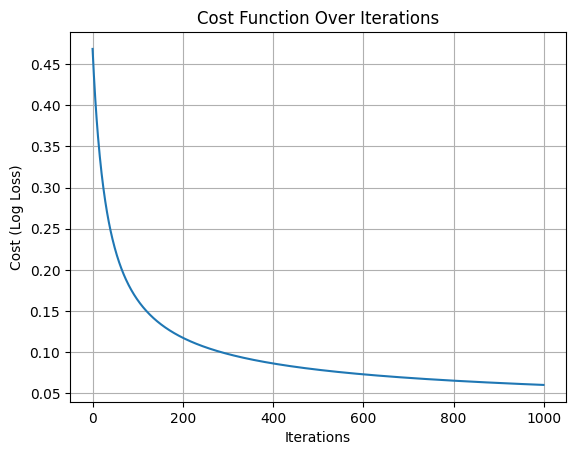

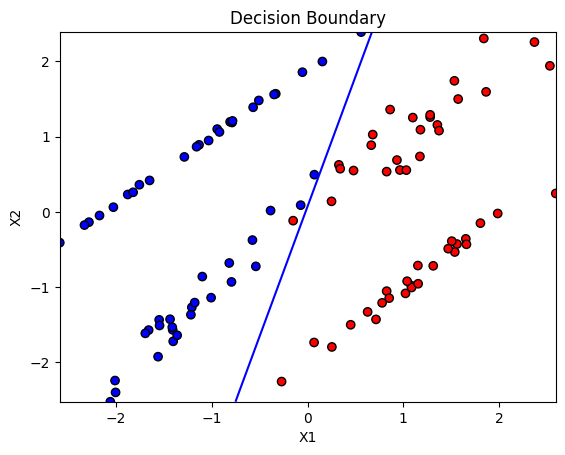

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate, num_iterations):
    # Add intercept term
    X = np.c_[np.ones((X.shape[0], 1)), X]

    # Reshape y to be a column vector
    y = y.reshape(-1, 1)

    # Initialize parameters
    theta = np.random.randn(X.shape[1], 1)

    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted probabilities
        z = np.dot(X, theta)
        predictions = sigmoid(z)

        # Calculate the error
        error = predictions - y

        # Calculate the gradients
        gradients = (1/m) * np.dot(X.T, error)

        # Update parameters
        theta -= learning_rate * gradients

        # Compute cost using log loss
        cost = -(1/m) * np.sum(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
        cost_history.append(cost)

    return theta, cost_history

# Generate random classification data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Train the logistic regression model
theta, cost_history = logistic_regression(X, y, learning_rate, num_iterations)

# Plot the cost function over iterations
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (Log Loss)')
plt.title('Cost Function Over Iterations')
plt.grid(True)
plt.show()

# Plot the decision boundary
X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
grid = np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()]
probs = sigmoid(np.dot(grid, theta)).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='blue')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.show()
